UN Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

gdp_df = pd.read_csv("gdp_per_capita.csv.csv")


In [4]:
gdp_df.head(10)


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [5]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [6]:
dict = {'Country or Area':'Country', 'Year':'Year', 'Value':'GDP_Per_Capita'}

In [7]:
gdp_df.rename(columns=dict, inplace=True)

In [8]:
gdp_df.drop(columns = ['Value Footnotes'], inplace=True)

In [9]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB
None


In [10]:
# 7662 rows, 3 columns

In [11]:
print(gdp_df.shape)

(7662, 3)


In [12]:
# data are collected from 1990 to 2022

In [13]:
print(gdp_df.groupby("Year").size())

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
dtype: int64


In [14]:
print(gdp_df.groupby("Country").size())

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33
Length: 242, dtype: int64


In [15]:
# 242 countries, Afghanistan is the least represented. the data collecion just started later than other countries.

In [16]:
gdp_20121 = gdp_df[gdp_df["Year"] == 2021]

In [17]:
gdp_20121.describe()

,Year,GDP_Per_Capita
count,241.0,241.000000
mean,2021.0,20711.570080
std,0.0,20916.978968
min,2021.0,714.066712
25%,2021.0,5044.196028
50%,2021.0,13754.802423
75%,2021.0,30974.370692
max,2021.0,115683.493708


In [18]:
print(gdp_20121)


                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2021     1517.016266
21    Africa Eastern and Southern  2021     3519.174840
54     Africa Western and Central  2021     4014.607965
87                        Albania  2021    14595.944386
120                       Algeria  2021    11029.138782
...                           ...   ...             ...
7502                     Viet Nam  2021    10628.219166
7535           West Bank and Gaza  2021     5641.044400
7564                        World  2021    17055.357429
7597                       Zambia  2021     3236.788981
7630                     Zimbabwe  2021     2115.144555

[241 rows x 3 columns]


<Axes: ylabel='Frequency'>

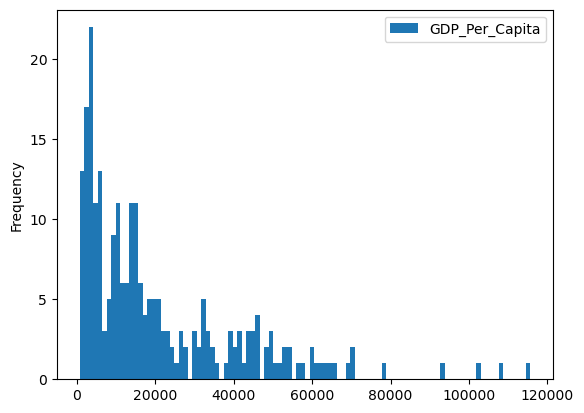

In [19]:
gdp_20121.plot.hist(column=["GDP_Per_Capita"], bins=100)

In [20]:
# The distribution is right skewed.

In [21]:
gdp_20121.sort_values('GDP_Per_Capita', ascending=False).head(5)

,Country,Year,GDP_Per_Capita
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515


In [22]:
gdp_20121.sort_values('GDP_Per_Capita', ascending=True).head(5)

,Country,Year,GDP_Per_Capita
972,Burundi,2021,714.066712
1216,Central African Republic,2021,837.504686
1629,Dem. Rep. Congo,2021,1073.643271
6272,Somalia,2021,1136.735989
5073,Niger,2021,1186.576809


In [23]:
gdp_pivoted = gdp_df.pivot_table(index="Country", columns="Year", values="GDP_Per_Capita").dropna(axis=0, how=any)

ValueError: invalid how option: <built-in function any>

In [ ]:
print(gdp_pivoted)